In [1]:
import numpy as np

In [59]:
class Adline:
    def __init__(self, eta = 0.01 , iter = 20):
        self.eta = eta
        self.iter = iter
        
    
    def fit(self,x,y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.cost_ = []
        
        for _ in range(self.iter):
            output = self.net_input(x)
            errors = y - output
            self.w_[1:] += self.eta*x.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/(2.0 * len(errors))
            self.cost_.append(cost)
        return self
            
    def net_input(self , x):
        return np.dot(x,self.w_[1:]) + self.w_[0]
    
    def activation(self, x):
        return self.net_input(x)
    
    def predict(self , x):
        return np.where(self.activation(x) >= 0.0, 1, -1)
    

In [20]:
import pandas as pd
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [21]:
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [22]:
import matplotlib.pyplot as plt

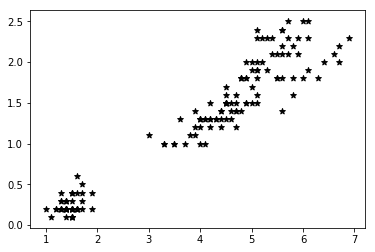

In [23]:
plt.scatter(dataset.iloc[: , 2].values , dataset.iloc[: , 3].values , color = 'k' , marker = "*" )
plt.show()

In [27]:
x = dataset.iloc[: , 2:4]

In [28]:
x_train = x.iloc[0 : 100 , :].values

In [30]:
y_train = np.where(dataset.iloc[ 0 : 100 , 4] == 'Iris-setosa' , -1 , 1)

In [31]:
x_test = x.iloc[100 : , :].values

In [32]:
y_test = np.where(dataset.iloc[100 : , 4] == 'Iris-setosa' , -1 , 1)

In [105]:
classifier = Adline(0.0001 , 200)

In [106]:
cf = classifier.fit(x_train,y_train)

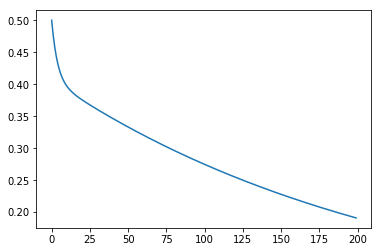

In [107]:
yaxis = cf.cost_
xaxis = [x for x in range(len(cf.cost_))]

plt.plot(xaxis,yaxis)
plt.show()

In [108]:
predy = cf.predict(x)
y = np.where(dataset.iloc[: , 4] == 'Iris-setosa' , -1 , 1)

xaxis = [x for x in range(len(predy))]

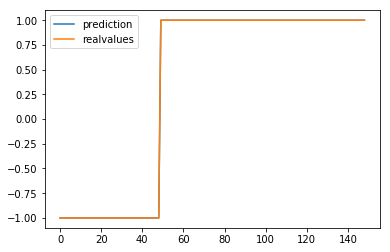

In [109]:
plt.plot(xaxis ,predy,label = "prediction")
plt.plot(xaxis,y , label = "realvalues")
plt.legend()
plt.show()